                                                Modified Carbon Cycle.

Ahsan Ali Khoja

Note: This notebook uses a "precise" unit of time, called 'centi-year'. Centi-years are 1/100 th of a year. So, 15000 centi-year equal to 150 years.

In [32]:
from matplotlib import pyplot as plt
%matplotlib inline

def atmos_ff(r=100):
    at_tp, ao_mp, ta_tr, oa_mr, ao_cd, oa_ev, do_up, od_dw, od_md, ts_pd, sa_pd = 14.7, 5.4, 9.2, 5.1,13.4,  12.5,  0.072,  2300,  400, 9.2, 3.7
    _flux, carry_capa_flux, r_chang_flux = 5, 15, 0.03
    r = r*100
    start_a, start_s, start_t, start_o, start_d, start_ff = 750, 1500, 600, 800, 38000, 4000
    #last = 750 - 110
    end_a = end_s = end_t = end_o = end_d = 0
    at_tp, ao_mp, ta_tr, oa_mr, ao_cd, oa_ev, do_up, od_dw, od_md, ts_pd, sa_pd = (at_tp*0.01, ao_mp*0.01, ta_tr*0.01, oa_mr*0.01, ao_cd*0.01, oa_ev*0.01, do_up*0.01, od_dw*0.01, od_md*0.01, ts_pd*0.01, sa_pd*0.01)
    final_at_tp = final_ao_mp = final_ta_tr = final_oa_mr = final_ao_cd = final_oa_ev = final_do_up = final_od_dw = final_od_md = final_ts_pd = final_sa_pd = final_ff = 0
    system_state = []
    a_o_change = []
    new_sys_state = []
    for i in range(r):
        # Initializing new rate of change between sources, and updating the total change between sources.
        _flux = _flux + ((r_chang_flux*0.01) * (1 - (_flux/carry_capa_flux)) * _flux)
        x_flux = _flux*0.01
        
        new_at_tp, new_ao_mp, new_ta_tr, new_oa_mr, new_ao_cd, new_oa_ev = (start_a * at_tp * 0.01), (start_a * ao_mp * 0.01), (start_t * ta_tr * 0.01), (start_o * oa_mr * 0.01), (start_a * ao_cd * 0.01), (start_o * oa_ev * 0.01)
        new_do_up, new_od_dw, new_od_md, new_ts_pd, new_sa_pd = (start_d * do_up * 0.01), (od_dw * 0.01), (od_md * 0.01), (start_t * ts_pd * 0.01), (start_s * sa_pd * 0.01)
        
        if start_a > start_o:
            net_change = abs(new_ao_mp + new_ao_cd - new_oa_mr - new_oa_ev) #positive transfer from A to O, add to O, subtract from A.
        elif start_a < start_o:
            net_change =  -1 * abs(new_ao_mp + new_ao_cd - new_oa_mr - new_oa_ev) # Negative transfer from A to O, add to O, subtract from A.
        else:
            net_change = 0
            
        final_at_tp, final_ao_mp, final_ta_tr, final_oa_mr, final_ao_cd, final_oa_ev = (final_at_tp + new_at_tp), (final_ao_mp + new_ao_mp), (final_ta_tr + new_ta_tr), (final_oa_mr + new_oa_mr), (final_ao_cd + new_ao_cd), (final_oa_ev + new_oa_ev)
        final_do_up, final_od_dw, final_od_md, final_ts_pd, final_sa_pd = (final_do_up + new_do_up), (final_od_dw + new_od_dw), (final_od_md + new_od_md), (final_ts_pd + new_ts_pd), (final_sa_pd + new_sa_pd)
        final_ff = final_ff + x_flux
        
        #Calculating the change and updating the new values
        end_a = start_a - new_at_tp - net_change + new_ta_tr + new_sa_pd + x_flux
        end_s = start_s - new_sa_pd + new_ts_pd
        end_t = start_t - new_ta_tr - new_ts_pd + new_at_tp
        end_o = start_o + net_change - new_od_dw - new_od_md + new_do_up
        end_d = start_d - new_do_up + new_od_dw + new_od_md
        end_ff = start_ff - x_flux
        start_a, start_s, start_t, start_o, start_d, start_ff = end_a, end_s, end_t, end_o, end_d, end_ff
        a_o_change.append((start_a, start_o, start_t, i))
        system_state.append((750-start_a, 600-start_t, 800-start_o, 38000-start_d, 1500-start_s, _flux, i))
        new_sys_state.append( (start_a, start_t, start_o, start_d, start_s, start_ff, i))
    
        #print (start_a, start_o)
        #print(net_change)
        #print(new_oa_mr, new_oa_ev, new_ao_mp,  new_ao_cd)
    #print (750-start_a, 600-start_t, 800-start_o, 38000-start_d, 1500-start_s, 4000-start_ff)
    #print(final_at_tp, final_ao_mp, final_ta_tr, final_oa_mr, final_ao_cd, final_oa_ev, final_do_up, final_od_dw, final_od_md, final_ts_pd, final_sa_pd, final_ff)
    
    return new_sys_state, system_state, a_o_change


In [33]:
# Verificcation model
#atmos(1)

                                            FOSSIL FUEL COMBUSTION & EFFECTS

The cell above, takes into account fossil fuel combustion and effects on the atmospheric carbon. Deforestation is NOT included yet. For the flux, constrained growth equation has been used, as can be seen above.

The code below plots the flux of fossil fuel carbon (amount of carbon being used for combustion).

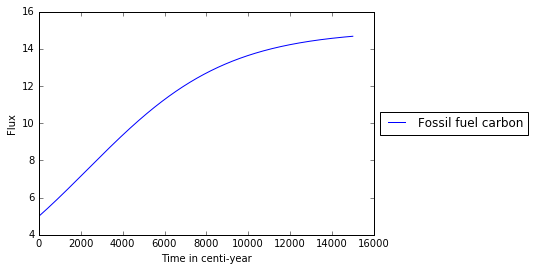

In [34]:
def plot_ff_flux(years):
    new_sys_state, system_state, a_o_change = atmos_ff(years)
    FF_flux = [i[5] for i in system_state]
    time = [i[6] for i in system_state]

    plt.plot(time,FF_flux,label='Fossil fuel carbon')
    plt.xlabel("Time in centi-year")
    plt.ylabel("Flux")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plot_ff_flux(150)

The cell below plots the fossil fuel amount in the reserve, atmospheric carbon and the oceanic carbon. Oceanic carbon has been included to confirm the relation between two sources, which was stated in the first lab.

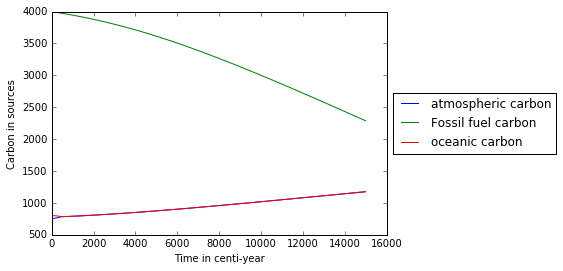

In [35]:
def plot_ff_current(years):
    new_sys_state, system_state, a_o_change = atmos_ff(years)
    atmosphere = [i[0] for i in new_sys_state]
    ocean = [i[2] for i in new_sys_state]
    FF_current = [i[5] for i in new_sys_state]
    time = [i[6] for i in new_sys_state]

    plt.plot(time,atmosphere,label='atmospheric carbon')
    plt.plot(time,FF_current,label='Fossil fuel carbon')
    plt.plot(time,ocean,label='oceanic carbon')
    plt.xlabel("Time in centi-year")
    plt.ylabel("Carbon in sources")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plot_ff_current(150)

                                                DEFORESTATION FINALLY!
                                                
The code below includes deforestation along with fossil fuel combustion, using similar constrained growth for the flux. It also has the temperature change portion that is being calculated using the formula provided in the book. We also assume that half of the CO2 due to deforestation goes to atmosphere and half goes to soil.

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

def atmos_ff_deforest(r=100):
    at_tp, ao_mp, ta_tr, oa_mr, ao_cd, oa_ev, do_up, od_dw, od_md, ts_pd, sa_pd = 14.7, 5.4, 9.2, 5.1,13.4,  12.5,  0.072,  2300,  400, 9.2, 3.7
    _flux, carry_capa_flux, r_chang_flux = 5, 15, 0.03
    deforest_flux, carry_capa_deforest_flux, r_chang_deforest_flux = 1.15, 15, 0.03
    
    r = r*100
    start_a, start_s, start_t, start_o, start_d, start_ff = 750, 1500, 600, 800, 38000, 4000
    #last = 750 - 110
    end_a = end_s = end_t = end_o = end_d = 0
    at_tp, ao_mp, ta_tr, oa_mr, ao_cd, oa_ev, do_up, od_dw, od_md, ts_pd, sa_pd = (at_tp*0.01, ao_mp*0.01, ta_tr*0.01, oa_mr*0.01, ao_cd*0.01, oa_ev*0.01, do_up*0.01, od_dw*0.01, od_md*0.01, ts_pd*0.01, sa_pd*0.01)
    final_at_tp = final_ao_mp = final_ta_tr = final_oa_mr = final_ao_cd = final_oa_ev = final_do_up = final_od_dw = final_od_md = final_ts_pd = final_sa_pd = final_ff = final_deforest = 0
    
    system_state = []
    a_o_change = []
    new_sys_state = []
    
    for i in range(r):
        # Initializing new rate of change between sources, and updating the total change between sources.
        _flux = _flux + ((r_chang_flux*0.01) * (1 - (_flux/carry_capa_flux)) * _flux)
        x_flux = _flux*0.01
        
        deforest_flux = deforest_flux + ((r_chang_deforest_flux*0.01) * (1 - (deforest_flux/carry_capa_deforest_flux)) * deforest_flux)
        x_deforest_flux = deforest_flux*0.01*0.5
        
        # Half of deforested carbon goes to atmosphere, and half goes to soil
        #Carbon Dioxide to Temperature Change
        CO2_ppm = 350 * (start_a/750)
        Temp_change = 0.01 * (CO2_ppm - 350)
        
        new_at_tp, new_ao_mp, new_ta_tr, new_oa_mr, new_ao_cd, new_oa_ev = (start_a * at_tp * 0.01), (start_a * ao_mp * 0.01), (start_t * ta_tr * 0.01), (start_o * oa_mr * 0.01), (start_a * ao_cd * 0.01), (start_o * oa_ev * 0.01)
        new_do_up, new_od_dw, new_od_md, new_ts_pd, new_sa_pd = (start_d * do_up * 0.01), (od_dw * 0.01), (od_md * 0.01), (start_t * ts_pd * 0.01), (start_s * sa_pd * 0.01)
        
        if start_a > start_o:
            net_change = abs(new_ao_mp + new_ao_cd - new_oa_mr - new_oa_ev) #positive transfer from A to O, add to O, subtract from A.
        elif start_a < start_o:
            net_change =  -1 * abs(new_ao_mp + new_ao_cd - new_oa_mr - new_oa_ev) # Negative transfer from A to O, add to O, subtract from A.
        else:
            net_change = 0
            
        final_at_tp, final_ao_mp, final_ta_tr, final_oa_mr, final_ao_cd, final_oa_ev = (final_at_tp + new_at_tp), (final_ao_mp + new_ao_mp), (final_ta_tr + new_ta_tr), (final_oa_mr + new_oa_mr), (final_ao_cd + new_ao_cd), (final_oa_ev + new_oa_ev)
        final_do_up, final_od_dw, final_od_md, final_ts_pd, final_sa_pd = (final_do_up + new_do_up), (final_od_dw + new_od_dw), (final_od_md + new_od_md), (final_ts_pd + new_ts_pd), (final_sa_pd + new_sa_pd)
        final_ff = final_ff + x_flux
        final_deforest = final_deforest + x_deforest_flux
        
        #Calculating the change and updating the new values
        end_a = start_a - new_at_tp - net_change + new_ta_tr + new_sa_pd + x_flux +x_deforest_flux
        end_s = start_s - new_sa_pd + new_ts_pd + x_deforest_flux
        end_t = start_t - new_ta_tr - new_ts_pd + new_at_tp - (x_deforest_flux*2)
        end_o = start_o + net_change - new_od_dw - new_od_md + new_do_up
        end_d = start_d - new_do_up + new_od_dw + new_od_md
        end_ff = start_ff - x_flux
        start_a, start_s, start_t, start_o, start_d, start_ff = end_a, end_s, end_t, end_o, end_d, end_ff
        a_o_change.append((start_a, start_o, start_t, i))
        system_state.append((750-start_a, 600-start_t, 800-start_o, 38000-start_d, 1500-start_s, _flux, deforest_flux, i, Temp_change))
        new_sys_state.append( (start_a, start_t, start_o, start_d, start_s, start_ff, i))
    
        #print (start_a, start_o)
        #print(net_change)
        #print(new_oa_mr, new_oa_ev, new_ao_mp,  new_ao_cd)
    #print (750-start_a, 600-start_t, 800-start_o, 38000-start_d, 1500-start_s, 4000-start_ff)
    #print(final_at_tp, final_ao_mp, final_ta_tr, final_oa_mr, final_ao_cd, final_oa_ev, final_do_up, final_od_dw, final_od_md, final_ts_pd, final_sa_pd, final_ff)
    
    return new_sys_state, system_state, a_o_change


The cell below plots the flux for carbon loss due to deforestation

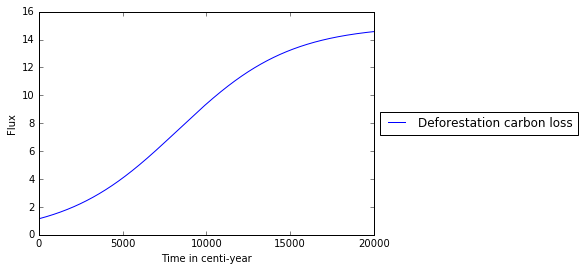

In [2]:
def plot_ff_deforest_flux(years):
    new_sys_state, system_state, a_o_change = atmos_ff_deforest(years)
    deforest_flux = [i[6] for i in system_state]
    time = [i[7] for i in system_state]

    plt.plot(time,deforest_flux,label='Deforestation carbon loss')
    plt.xlabel("Time in centi-year")
    plt.ylabel("Flux")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plot_ff_deforest_flux(200)

The cell below plots atmospheric, oceanic, terrestial and fossil fuel carbon reserve.

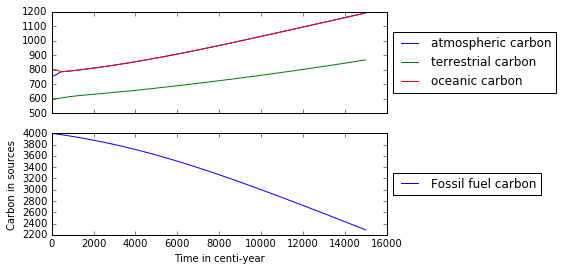

In [3]:
def plot_ff_deforest_current(years):
    new_sys_state, system_state, a_o_change = atmos_ff_deforest(years)
    atmosphere = [i[0] for i in new_sys_state]
    terrestial = [i[1] for i in new_sys_state]
    ocean = [i[2] for i in new_sys_state]
    FF_current = [i[5] for i in new_sys_state]
    time = [i[6] for i in new_sys_state]
    
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

    ax1.plot(time,atmosphere,label='atmospheric carbon')
    ax1.plot(time,terrestial,label='terrestrial carbon')
    ax2.plot(time,FF_current,label='Fossil fuel carbon')
    ax1.plot(time,ocean,label='oceanic carbon')
    plt.xlabel("Time in centi-year")
    plt.ylabel("Carbon in sources")
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plot_ff_deforest_current(150)

The cell below plots atmospheric carbon to see the change in it over time.

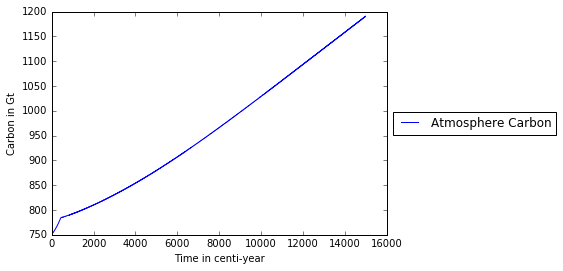

In [4]:
def plot_atmosphere(years):
    new_sys_state, system_state, a_o_change = atmos_ff_deforest(years)
    atmosphere = [i[0] for i in a_o_change]
    time = [i[3] for i in a_o_change]

    plt.plot(time,atmosphere,label='Atmosphere Carbon')
    plt.xlabel("Time in centi-year")
    plt.ylabel("Carbon in Gt")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plot_atmosphere(150)

The cell below plots Deep Oceanic carbon to check for the effects of deforesation and fossil fuel combustion on it.

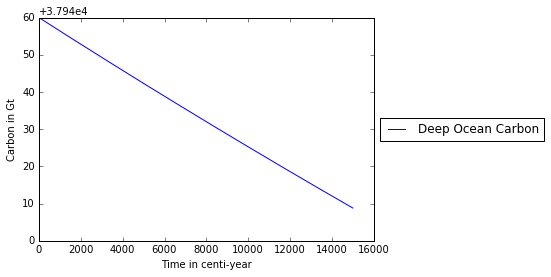

In [5]:
def plot_deepOcean(years):
    new_sys_state, system_state, a_o_change = atmos_ff_deforest(years)
    deepOcean = [i[3] for i in new_sys_state]
    time = [i[6] for i in new_sys_state]

    plt.plot(time,deepOcean,label='Deep Ocean Carbon')
    plt.xlabel("Time in centi-year")
    plt.ylabel("Carbon in Gt")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plot_deepOcean(150)

Finally, the cell below plots temperature changes for over 150 years, to look for the rise in temperature in 'C

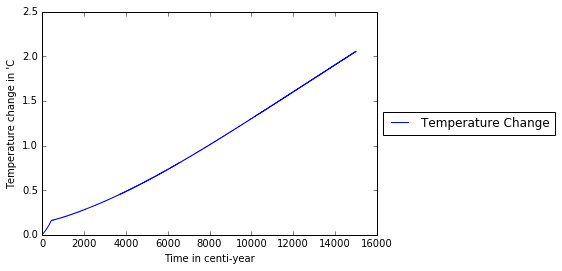

In [6]:
# Plots temperature change due to deforestation and fossil suel combustion

def plot_temperature(years):
    new_sys_state, system_state, a_o_change = atmos_ff_deforest(years)
    temperature = [i[8] for i in system_state]
    time = [i[7] for i in system_state]

    plt.plot(time,temperature,label='Temperature Change')
    plt.xlabel("Time in centi-year")
    plt.ylabel("Temperature change in 'C")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plot_temperature(150)

                                                COMPARISON

The model we are comparing with is the one prepared by Max and Chau. Their model (as it was the last time we saw it) remains constant, and shows no change (or negligible change) in the carbon. Our model runs for at least 150 years, and shows viable changes, as one might predict. What makes us more confident that our model is producing reasonable output is the fact that our graph for temperature change matches with the predicton stated in the book (change of ~ 1.4'C - 5.8'C by the end of 21st century).